<a href="https://colab.research.google.com/github/KaustavDeb/Water-Potability-Prediction/blob/main/Water_Potability_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving water_potability.csv to water_potability.csv
User uploaded file "water_potability.csv" with length 525187 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(io.BytesIO(uploaded ['water_potability.csv']))
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [15]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.shape

(3276, 10)

In [6]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [10]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [14]:
for i in range(df.shape[1]):
  df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].median())
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [16]:
se=MinMaxScaler ()
df_n=pd.DataFrame(se.fit_transform(df),columns=df.columns)
df_n

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.579704,0.368912,0.678284,0.534508,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.579704,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.579704,0.387157,0.343638,0.622659,0.616120,1.0


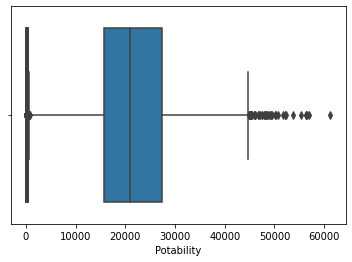

In [17]:
for i in range(df_n.shape[1]):
  sns.boxplot(x=df.iloc[:,i])

In [18]:
from scipy import stats
df_z=np.abs(stats.zscore(df_n))
df_z

array([[2.54735465e-02, 2.59194711e-01, 1.39470871e-01, ...,
        1.30543373e+00, 1.28629758e+00, 7.99774743e-01],
       [2.28471739e+00, 2.03641367e+00, 3.85986650e-01, ...,
        6.39186284e-01, 6.84217891e-01, 7.99774743e-01],
       [6.97319183e-01, 8.47664833e-01, 2.40047337e-01, ...,
        8.00012586e-04, 1.16736546e+00, 7.99774743e-01],
       ...,
       [1.59565368e+00, 6.26829230e-01, 1.27080989e+00, ...,
        2.18037800e-01, 8.56006782e-01, 1.25035206e+00],
       [1.32494885e+00, 1.04135450e+00, 1.14405809e+00, ...,
        7.02755628e-01, 9.50797383e-01, 1.25035206e+00],
       [5.44611034e-01, 3.85462310e-02, 5.25811937e-01, ...,
        7.79510303e-01, 2.12445866e+00, 1.25035206e+00]])

In [19]:
 
 
df_N=df_n[(df_z<3).all(axis=1)]
df_N

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.579704,0.368912,0.678284,0.534508,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.579704,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.579704,0.387157,0.343638,0.622659,0.616120,1.0


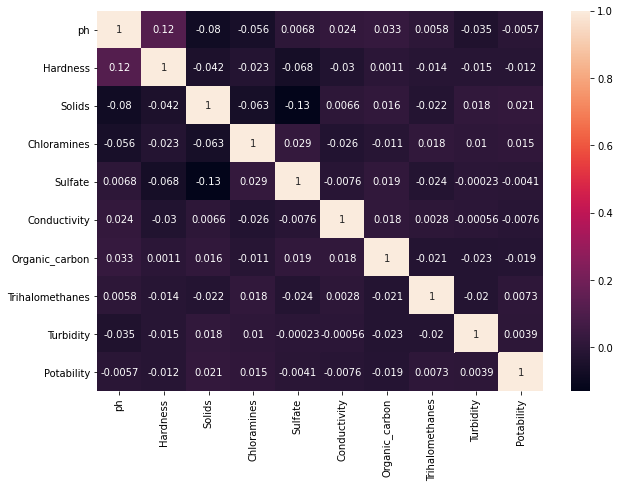

In [20]:
corr=df_N.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [21]:
import statsmodels.api as sm
W=sm.tools.add_constant(df_N)
W

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,1.0,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,1.0,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,1.0,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,1.0,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3271,1.0,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,1.0,0.557775,0.530016,0.279263,0.603473,0.579704,0.368912,0.678284,0.534508,0.254915,1.0
3273,1.0,0.672822,0.465486,0.539101,0.547807,0.579704,0.438152,0.338662,0.560655,0.349570,1.0
3274,1.0,0.366197,0.664407,0.191490,0.465860,0.579704,0.387157,0.343638,0.622659,0.616120,1.0


In [22]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
Df=[variance_inflation_factor(W.values,i) for i in range(W.shape[1])]
Df

[180.5538755262297,
 1.0267319003131412,
 1.0231385018895116,
 1.0316245797570969,
 1.00982119283315,
 1.0245691066176588,
 1.0027866092331665,
 1.0035132498536756,
 1.0026867240688253,
 1.0025545788012111,
 1.001293809746217]

In [23]:
df_N

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.579704,0.368912,0.678284,0.534508,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.579704,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.579704,0.387157,0.343638,0.622659,0.616120,1.0


In [24]:
lg=LogisticRegression ()
Y=df_N['Potability']
X=df_N.drop('Potability',axis=1)
X_train,X_test,y_train,y_test=train_test_split(df_N,Y,test_size=0.2,random_state=0)

In [25]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
yp=lg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(yp,y_test)

1.0

In [27]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(X_train,y_train)
yp1=gn.predict(X_test)
accuracy_score(yp1,y_test)

1.0

In [28]:
gn.predict(df_N.iloc[3040:3041,:])

array([1.])

In [31]:
from sklearn import svm
sv=svm.SVC(kernel='rbf')
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
sv.score(X_test,y_test)

1.0

In [34]:
sv.predict(df_N.iloc[0:1,:])

array([0.])